# Tímadæmi 5 – Dæmi úr Stanford kennslubók

Hér eru valin dæmi úr 1. kafla í Stanford-kennslubókinni ásamt viðbótum fyrir Python. Leysið dæmin úr bókinni með blaði og blýanti, en viðbæturnar í Júpíter. Þið þurfið að sýna dæmakennaranum ykkar lausnirnar bæði á blaðinu og skjánum til að fá mætingu.

In [1]:
#BYRJA -- Keyrið til að frumstilla numpy o.fl.
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
%matplotlib inline
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=3, floatmode='fixed', suppress=True)

### Mismunavigur (dæmi 1.6)
**Leiðbeining:** *Skoðið vigrana $x_{2:n}$ og $x_{1:n-1}$.*

**Viðbót:**<br>
a) Lesið Stykkishólms-hitaröðina ``stykk.txt`` og reiknið og teiknið mismunaröð hennar (eða mismunavigur, *vector of differences*), bæði með því að nota svarið við dæminu og með því að nota innbyggða Numpy-fallið `np.diff`.

b) Takið eftir að breytingar frá ári til árs voru að jafnaði meiri á köldu tímabilunum, á 19. öld og á seinni hluta þeirrar 20. Þetta sést enn betur ef við skoðum röð með tölugildi breytinganna. Reiknið og teiknið slíka röð. Teiknið hitastigin sjálf inn á sama graf.

c) Reiknið meðaltal tölugildis breytinga annarsvegar fyrir og hinsvegar eftir 1925.

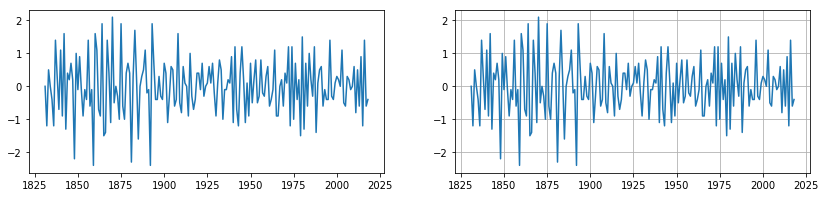

In [22]:
# a-liður
(ar, hiti) = np.loadtxt("stykk.txt").T
n = len(hiti)
mismuna = hiti[1:] - hiti[:-1]
mismunur = np.diff(hiti)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1); plt.plot(ar[1:], mismunur)
plt.subplot(1,2,2); plt.plot(ar[1:], mismuna)
plt.grid()

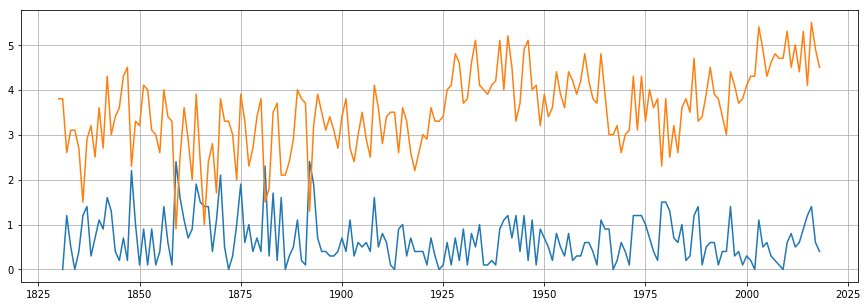

In [31]:
#b-liður
absMis = abs(mismuna)
plt.figure(figsize=(15,5))
plt.plot(ar[1:],absMis)
plt.plot(ar, hiti)
plt.grid()

In [46]:
#c-liður
# fyrir 1925
pre25 = np.mean(absMis[ar[1:] < 1925])
print(f'Meðaltal tölugildi breytinga fyrir 1925: {pre25:.2f}')
# eftir 25
post25 = np.mean(absMis[ar[1:] > 1925])
print(f'Meðaltal tölugildi breytinga eftir 1925: {post25:.2f}')

Meðaltal tölugildi breytinga fyrir 1925: 0.76
Meðaltal tölugildi breytinga eftir 1925: 0.60


### Breytt milli tveggja aðferða við að kóða rökvigur (d. 1.7)
*Ath.* Það er hægt að skrifa $y$ útfrá $x$ og öfugt með því að nota ásavigur, köllum hann **1** (eða $e$ eins og er líka algengt), samlagningu/frádrátt vigra og margföldun vigurs með tölu.

**Viðbót:**<br>
Finnið vigur `x` sem er 1 ef árið í Stykkishólmi var hlýrra en 4° að meðaltali, annars 0. Reiknið y. 

**Ath.** Í stærðfræði þarf að skrifa $x + e$ (eða $x\ +$ **1**) til að leggja 1 við öll stök vigurs $x$, en í Python má leggja saman vigur og tölu og skrifa `x + 1`.

In [50]:
#D1.7
x = np.zeros(len(hiti), np.int)

x[hiti > 4] = 1
y = 2*x - 1
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1  1 -1
 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


### Heildarhagnaður (d. 1.8)
(Hér er $p$ vigur með hagnaði á einingu fyrir hverja af $n$ vörum, og $s$ er vigur með fjölda seldra eininga. Það á svo (auðvitað) að tákna heildarhagnað með innfeldi.)

**Viðbót:**<br>
a) Lát $p = (100, 120, -50, 100, 150, -10, 80)$ og $s = (10, 15, 30, 60, 40, 40, 10). Reiknið heildarhagnað.

b) Finnið númer þeirra vörutegunda sem eru seldar með tapi (*loss leaders*) með Python (svarið á að vera 2 og 5.

In [60]:
#D1.8
#a = np.array([1,2,3])
#b = np.array([4,5,6])
#c = np.array([1/3,1/3,1/3])
#print(np.dot(a,b))
#print(1*4+2*5+3*6)
# a
p = np.array([100,120,-50,100,150,-10,80])
s = np.array([10,15,30,60,40,40,10])
print(np.dot(p,s))
# b
print(np.where(p < 0))

13700
(array([2, 5]),)


### Sjúkdómseinkenni (1.9)
**Ath.** Hér verður látið duga að sýna svar á blaði. Við höfum sem sé vigur $s = (s_1,...,s_{20})$ og $s_i$ er 1 ef sjúklingur hefur einkenni $i$. Svo á að nota vigurrithátt til að sýna:<br>
(a) heildarfjölda einkenna sem sjúklingurinn hefur og<br>
(b) satt/ósatt eftir því hvort sj. hefur nákvæmlega 5 af fyrstu 10 einkennunum

In [76]:
# a
s = np.array([1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1])
fjEink = sum(s)
print(f'Kjúklingurinn er með {fjEink} einkenni')
# b
sum(s[:10]) == 5

Kjúklingurinn er með 11 einkenni


True

### Orðatalning (1.11)
Hér liggur fyrir orðabók með $n$ orðum og tiltekið skjal: $w_i$ er fjöldi skipta sem orð nr. $i$  kemur fyrir í bókinni. Svo er spurt:<br>
<br>
(a) Hvað er **1**$^Tw$<br>
(b) Hvað þýðir $w_{282} = 0$?<br>
(c) Finnið formúlu fyrir vigri $h$ sem gefur hlutfall hvers orðs í textanum<br>
$\ \ \ $ (ef "og" væri 3. orðið í orðabókinni og $1/10$ af orðum skjalsins væru "og" þá yrði $h_3 = 0.1$) 

# a) er samlangning á öllu sem er í vigri w

# b) i kemur aldrei fyrir í skjali á stað 282 í vigri w

# c) H = W / sum(W)

In [78]:
w = np.array([1,3,2,6,3,1])

medal = 1/sum(w)

print(medal*w)

[0.062 0.188 0.125 0.375 0.188 0.062]


### Meðalaldur í þýði (1.13)
Hér er $x$ 100 staka vigur þar sem $x_i$ er fjöldi í þýði sem eru á $i$-ta aldursári, $i = 1,...,100$ (svo t.d. $x_{20}$ er fjöldi 20 ára). Svo á að finna:<br>
<br>
(a) Heildarfjöldann í þýðinu<br>
(b) Heildarfjölda sem eru orðnir 65 ára<br>
(c) Meðalaldur þýðisins.

**Viðbót**
Látið $x_i = 505 - 5i, i=1,...,100$ og ákvarðið svörin við (a), (b) og (c) með Python.

#D1.13
a) sum(x)
b) x[66]
c np.mean(x)

In [100]:
a = np.arange(10)
fjKrakka = np.array([3,6,1,3,2,1,6,2,8,2])
marg = a*fjKrakka

print(np.dot(a,fjKrakka)/sum(fjKrakka))

4.764705882352941
